**Importing Libraries**

In [151]:
# Import Necessary libraries
import pandas as pd
import numpy as np
%pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso


**Load the Datasets**

In [152]:
# Load the product and sales datasets
df=pd.read_csv('product.csv',index_col=0)
df_sales=pd.read_csv('sales.csv',index_col=0)
df.head()

,brand,flavour,volume_per_joghurt_g,packsize,product_id
0,Mueller,blueberry,150,6,0
1,Oikos,chocolate,1000,1,1
2,Alnatura,strawberry,1000,1,2
3,Mueller,straciatella,500,6,3
4,Danone,straciatella,150,6,4


In [153]:
#Checking for null variables
df.isnull().sum()

brand                   0
flavour                 0
volume_per_joghurt_g    0
packsize                0
product_id              0
dtype: int64

In [154]:
#Checking for null variables
df_sales.isnull().sum()

date          0
product_id    0
price         0
units         0
dtype: int64

In [155]:
# Merge both datasets
df_total=df_sales.merge(df,on='product_id',how='left')
df_total.head()


,date,product_id,price,units,brand,flavour,volume_per_joghurt_g,packsize
0,2020-01-01,0,4.65,1126.0,Mueller,blueberry,150,6
1,2020-01-02,0,4.76,1205.0,Mueller,blueberry,150,6
2,2020-01-03,0,5.22,1007.0,Mueller,blueberry,150,6
3,2020-01-04,0,5.45,1282.0,Mueller,blueberry,150,6
4,2020-01-05,0,3.33,1037.0,Mueller,blueberry,150,6


In [156]:
# Basic statistical description of the dataset
df_total.describe()

,product_id,price,units,volume_per_joghurt_g,packsize
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,12.911538,5.288538,1177.496154,611.538462,4.653846
std,7.846738,1.881547,401.771103,335.282884,2.222078
min,0.000000,1.460000,16.000000,150.000000,1.000000
25%,6.000000,3.965000,944.000000,500.000000,1.000000
50%,13.000000,5.140000,1275.500000,500.000000,6.000000
75%,20.000000,6.785000,1453.250000,1000.000000,6.000000
max,26.000000,9.420000,2170.000000,1000.000000,6.000000


In [157]:
#Number of products in the data set
products=df_total['product_id'].unique()
print(products)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [158]:
# Number and name of the brands of the products
brands=df_total['brand'].unique()
print(brands)

['Mueller' 'Oikos' 'Alnatura' 'Danone' 'Rewe' 'Activia' 'Ja!'
 'Ecke-Mit-Was-Drin' 'Actimel']


In [159]:
# Differentiation of the products' flavours
flavours=df_total['flavour'].unique()
print(flavours)

['blueberry' 'chocolate' 'strawberry' 'straciatella' 'raspberry']


In [160]:
# Calculation of a new variable "Revenue" for each brand
revenue=df_total.price*df_total.units
df_total['revenue']=revenue

<AxesSubplot:xlabel='date', ylabel='revenue'>

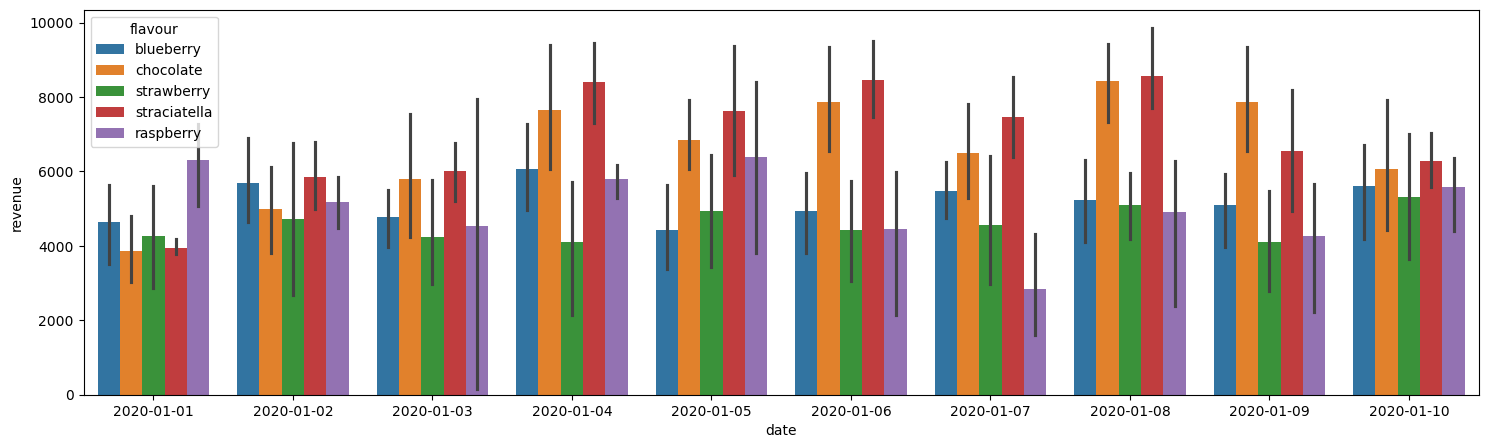

In [161]:
# Average revenue for each flavour from January to Octuber 2020) 
fig, ax=plt.subplots(figsize=(18,5))
sns.barplot(data=df_total,x='date', y='revenue', hue='flavour')

<AxesSubplot:xlabel='brand'>

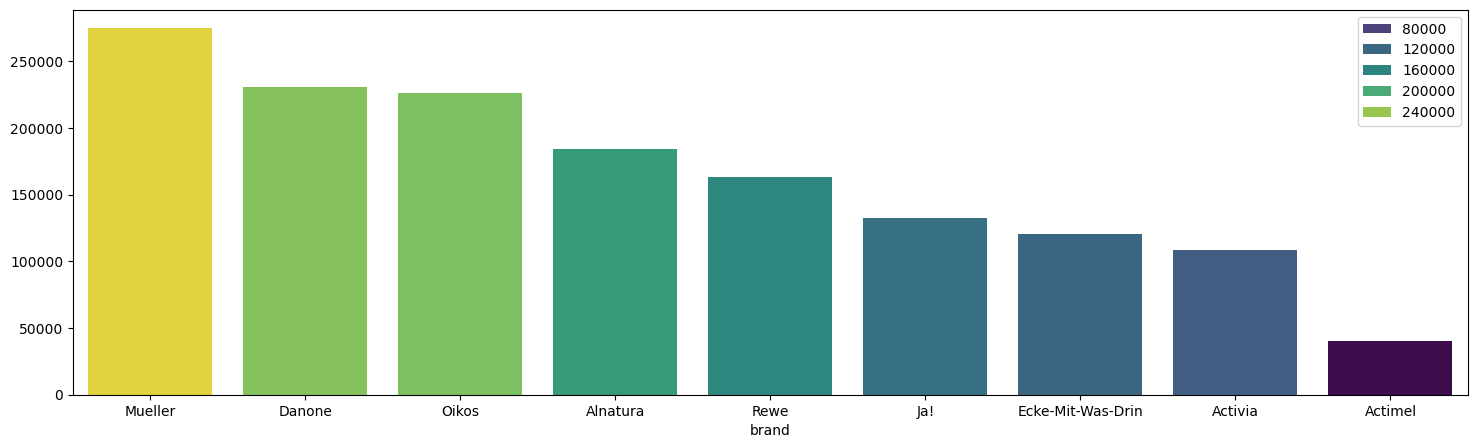

In [162]:
# Top 10 brands by revenue by month
df_byBrand=df_total.groupby(['brand'])['revenue'].sum()
top_brand=df_byBrand.nlargest(9)
fig, ax=plt.subplots(figsize=(18,5))
sns.barplot(x=df_byBrand.index, y=df_byBrand.values, hue=df_byBrand.values, order=top_brand.index, palette='viridis')

In [220]:
#Top Flavours sold from January to October 2020
df_byFlavour=df_total.groupby(['flavour'], as_index=False )['units'].sum()
df_byFlavour=df_byFlavour.sort_values(by=['units'], ascending=False)
df_byFlavour.head()

,flavour,units
3,3,82826.0
1,1,71241.0
0,0,66842.0
4,4,62922.0
2,2,22318.0


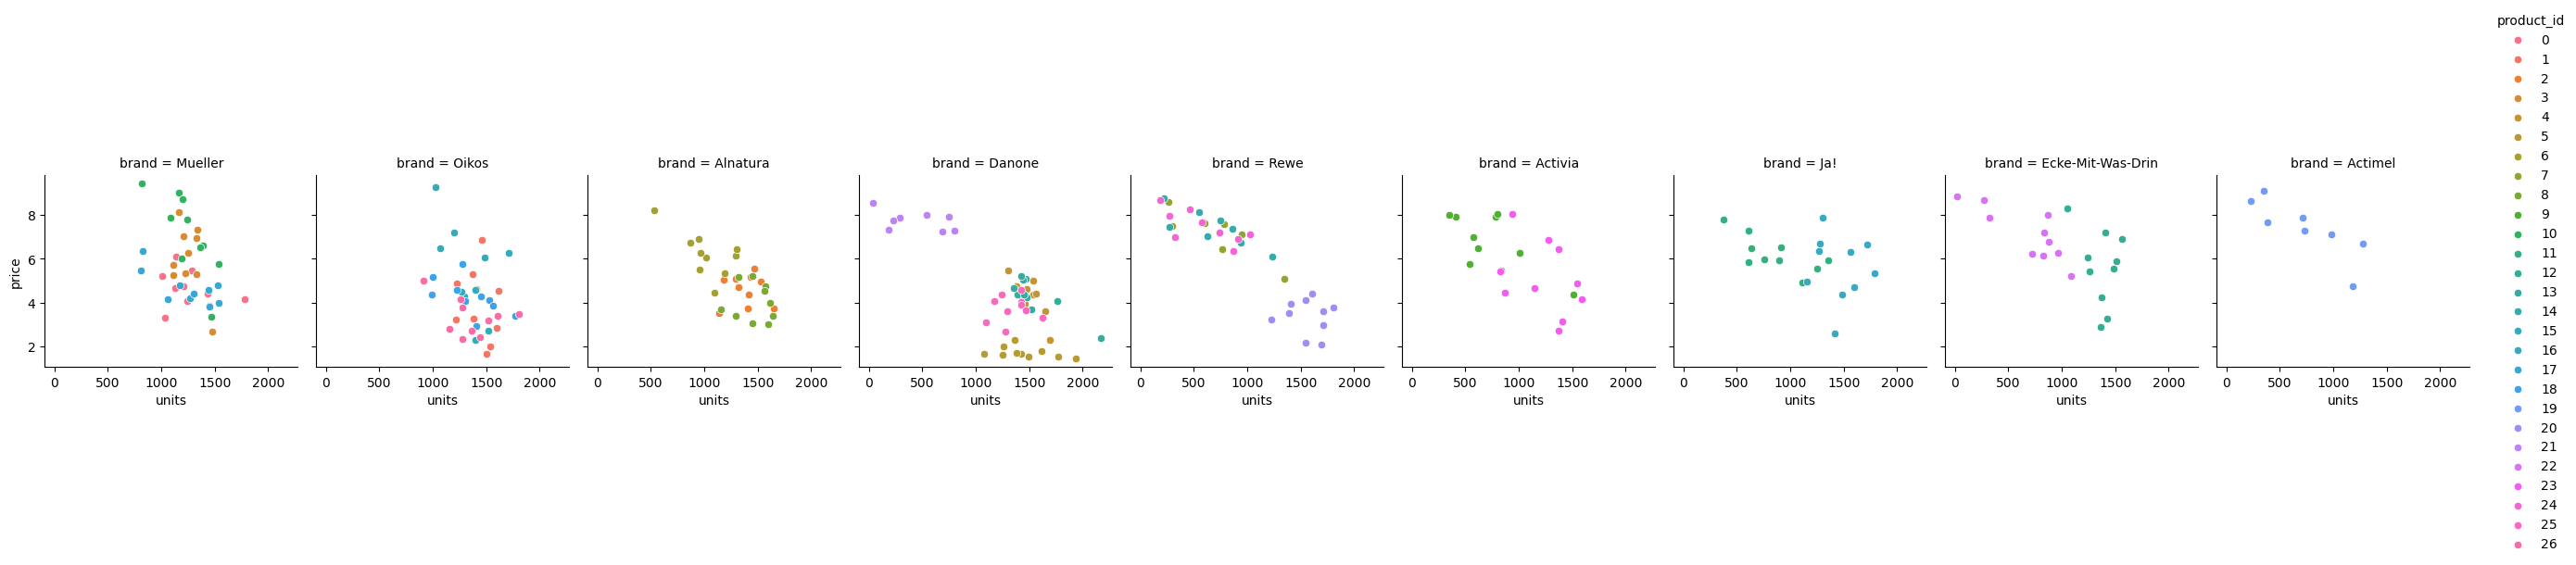

In [164]:
#Multiple plots for each brand's products (price vs quantity behavior)
sea=sns.FacetGrid(df_total,col='brand',hue='product_id')
sea.map(sns.scatterplot,'units','price')
sea.add_legend()

**Label Encoder**

In [221]:
# Label encoder for converting categorical columns to numerical 
label_encoder=LabelEncoder()
df_total['date']=label_encoder.fit_transform(df_total['date'])
df_total['brand']=label_encoder.fit_transform(df_total['brand'])
df_total['flavour']=label_encoder.fit_transform(df_total['flavour'])
print(df_total)

     date  product_id  price   units  brand  flavour  volume_per_joghurt_g  \
0       0           0   4.65  1126.0      6        0                   150   
1       1           0   4.76  1205.0      6        0                   150   
2       2           0   5.22  1007.0      6        0                   150   
3       3           0   5.45  1282.0      6        0                   150   
4       4           0   3.33  1037.0      6        0                   150   
..    ...         ...    ...     ...    ...      ...                   ...   
255     5          26   3.18  1524.0      7        4                   500   
256     6          26   2.81  1153.0      7        4                   500   
257     7          26   5.00   913.0      7        4                   500   
258     8          26   3.38  1603.0      7        4                   500   
259     9          26   4.15  1263.0      7        4                   500   

     packsize  revenue  
0           6  5235.90  
1           6

**Model Building**

In [218]:
#Create variables for results and prediction
results=[]
prediction_y=[]
for i in range(0,len(products)):

    #Select features (X) and target variable (y) for units
    df2=df_total[df_total['product_id']==i]
    X=df2.drop('units', axis=1)
    y=df2['units']

    #Splits the dataset into training and testis sets
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
    
    #Scaling the data set into common range
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    #Linear regression 
    linear_reg=LinearRegression()
    linear_reg.fit(X_train_scaled, y_train)
    linear_reg_predictions=linear_reg.predict(X_test_scaled)

    #Decision Tree Regressor
    decision_tree_reg=DecisionTreeRegressor(random_state=42)
    decision_tree_reg.fit(X_train_scaled,y_train)
    decision_tree_predictions=decision_tree_reg.predict(X_test_scaled)

    #Lasso linear regression
    lassoregression = Lasso(alpha=1, max_iter=10000)
    lassoregression.fit(X_train_scaled,y_train)
    lasso_pred = lassoregression.predict(X_test_scaled)

    #Model Evaluation with MSE and R2 measures
    prod_res=[]
    model_predictions=[]
    models={'Linear Regression':linear_reg,'Decision Tree Regresor':decision_tree_reg, 'Lasso Regression':lassoregression}
    
    for name, model in models.items():
        
        predictions=model.predict(X_test_scaled)
        mse=mean_squared_error(y_test, predictions)
        r2=r2_score(y_test,predictions)
        model_predictions.append(predictions)
        model_predictions.append(y_test)
        prod_res.append(mse)
        prod_res.append(r2)
    results.append(prod_res)
    prediction_y.append(model_predictions)


**Model Evaluation by product**

In [219]:
# Table of results for each product's model and its MSE and R2
df_results=pd.DataFrame(data=results,columns=['LinearReg_MSE','LinearReg_R2','DecisionTreeReg_MSE','DecisionTreeReg_R2','LassoReg_MSE','LassoReg_R2'])
#df_prediction=pd.DataFrame(data=prediction_y)
print(df_results)

    LinearReg_MSE  LinearReg_R2  DecisionTreeReg_MSE  DecisionTreeReg_R2  \
0      159.250183      0.987417               3229.0            0.744869   
1     1250.185664      0.814071               1229.0            0.817222   
2     4320.505358      0.466604              81402.5           -9.049691   
3     1092.417770  -1091.417770              19125.0       -19124.000000   
4       13.772738      0.999227               5337.0            0.700543   
5     2320.814324      0.964999              28076.5            0.576563   
6     1310.228237      0.899182              12702.5            0.022584   
7    27418.253531      0.899569             168712.0            0.382021   
8     3617.862248      0.937451              26820.0            0.536309   
9    57956.102622      0.488166             168702.5           -0.489880   
10    4450.473921   -218.776490              37442.5        -1848.012346   
11    1680.730072      0.980946             107018.5           -0.213238   
12    1819.8